In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
from scipy import stats
from scipy.stats import sem
from scipy.stats import linregress
from sklearn import datasets
import pandas as pd
import numpy as np
import scipy.stats as st
import pandas as pd
import matplotlib.ticker as ticker
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import and read movie_clean.csv
clean_data = "Resource/movie_clean.csv"
clean_data_df = pd.read_csv(clean_data)

# Display dataframe
clean_data_df.head()

,Rank,Title,Duration (min),Rating,Director,Cast,Release Date,Production Cost,Worldwide Gross,Opening Weekend,MPAA,Genre
0,0,Avengers: Endgame,181.0,8.4,Anthony Russo,"Joe Russo, Robert Downey Jr., Chris Evans, Mar...",2019-04-23,400000000,2797800564,357115007.0,PG-13,Action
1,1,Pirates of the Caribbean: On Stranger Tides,137.0,6.6,Rob Marshall,"Johnny Depp, Penélope Cruz, Ian McShane, Geoff...",2011-05-20,379000000,1045713802,90151958.0,PG-13,Adventure
2,2,Avengers: Age of Ultron,141.0,7.3,Joss Whedon,"Robert Downey Jr., Chris Evans, Mark Ruffalo, ...",2015-04-22,365000000,1395316979,191271109.0,PG-13,Action
3,4,Avengers: Infinity War,149.0,8.4,Anthony Russo,"Joe Russo, Robert Downey Jr., Chris Hemsworth,...",2018-04-25,300000000,2048359754,257698183.0,PG-13,Action
4,6,Justice League,120.0,6.1,Zack Snyder,"Ben Affleck, Gal Gadot, Jason Momoa, Ezra Miller",2017-11-13,300000000,655945209,93842239.0,PG-13,Action


In [3]:
# Copy clean df and drop all columns except worldwide sales, production cost, and genre
profit_margin_df=clean_data_df.copy()
profit_margin_df.drop(profit_margin_df.columns[[0,1,2,3,4,5,6,9,10]],axis=1,inplace=True)
profit_margin=profit_margin_df['Worldwide Gross']-profit_margin_df['Production Cost']

# Calculate profit margin by movie and store as a new column
profit_margin_df.insert(3,"Profit Margin",profit_margin,True)
profit_margin_df.drop(profit_margin_df.columns[[0,1]],axis=1,inplace=True)

# Display dataframe and data types
profit_margin_df
profit_margin_df.dtypes

,Genre,Profit Margin
0,Action,2397800564
1,Adventure,666713802
2,Action,1030316979
3,Action,1748359754
4,Action,355945209
...,...,...
455,Action,212249198
456,Western,-68088638
457,Western,-68088638
458,Adventure,-73482678


Genre            object
Profit Margin     int64
dtype: object

In [4]:
# Calculate number of unique genres in profit_margin_df
genre_values_unique=[]

genre_count_unique=profit_margin_df['Genre'].nunique()
genre_values_unique=profit_margin_df['Genre'].unique()

# Display unique count and values
genre_count_unique
genre_values_unique


9

array(['Action', 'Adventure', 'Musical', 'Western', 'Drama',
       'Thriller/Suspense', 'Comedy', 'Black Comedy', 'Horror'],
      dtype=object)

([<matplotlib.axis.XTick at 0x1a76ed68ac0>,
 [Text(1, 0, 'Action'),
  Text(2, 0, 'Adventure'),
  Text(3, 0, 'Musical'),
  Text(4, 0, 'Western'),
  Text(5, 0, 'Drama'),
  Text(6, 0, 'Thriller/Suspense'),
  Text(7, 0, 'Comedy'),
  Text(8, 0, 'Black Comedy'),
  Text(9, 0, 'Horror')])

Text(0.5, 1.0, 'Profit Margin by Genre')

Text(0.5, 0, 'Genre')

Text(0, 0.5, 'Profit Margin')

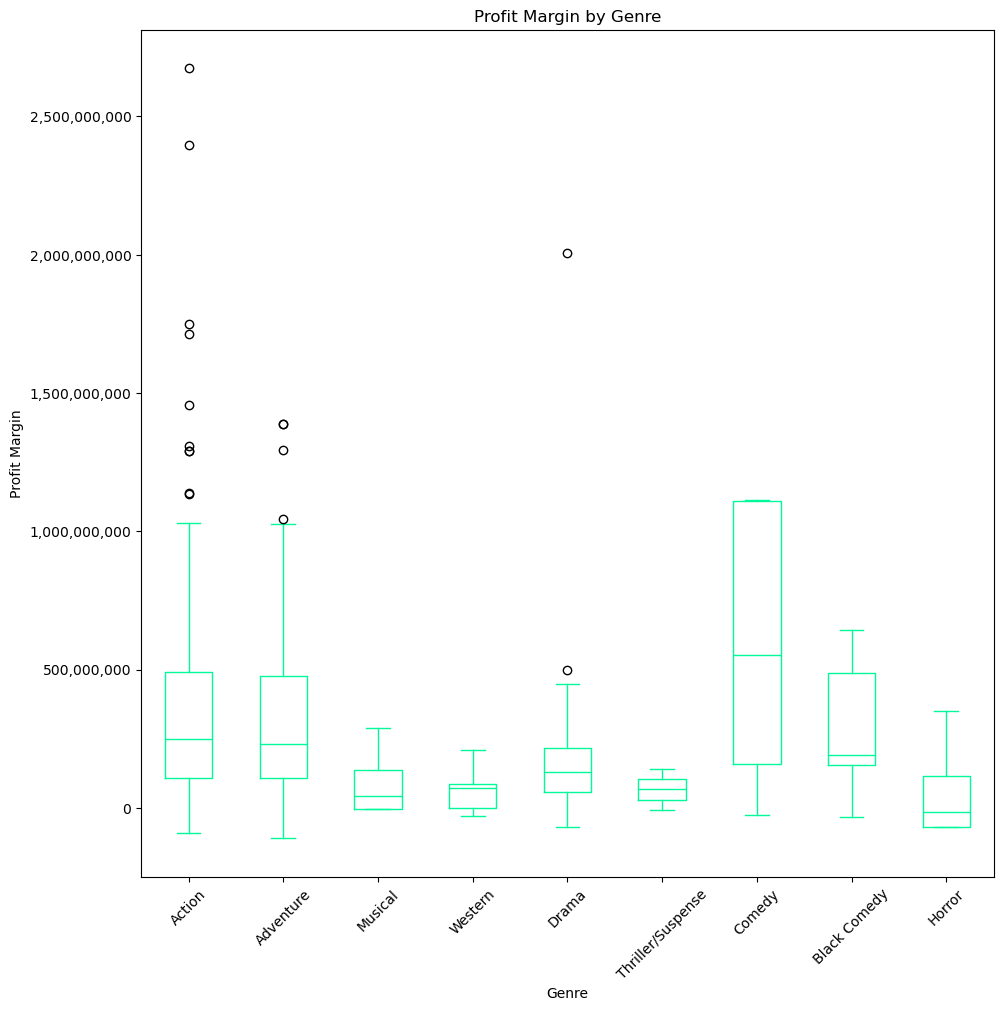

In [16]:
# Create box plot for profit margin by genre
box_plot = profit_margin_df.plot.box(column='Profit Margin', by='Genre', color='mediumspringgreen', figsize=(11, 11))

# Additional chart formatting
plt.xticks(range(1, len(genre_values_unique) + 1), genre_values_unique, rotation=45)
plt.title('Profit Margin by Genre')
plt.xlabel('Genre')
plt.ylabel('Profit Margin')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: f'{int(y):,}'))

# Save image to Visuals folder
plt.savefig("movie_analysis_visualizations/profit_margin_by_genre.png")

# Display chart
plt.show()

In [6]:
# ANOVA Analysis pt.1

# Initialize an empty dictionary to store the groups
groups = {}
unique_genres = profit_margin_df["Genre"].unique()

# Create groups based on the genre
for genre in unique_genres:
    group_name = f"group_{genre}"
    group = profit_margin_df[profit_margin_df["Genre"].apply(lambda x: genre in x)]["Profit Margin"]
    groups[group_name] = group

# Access the groups using the dictionary
for group_name, group_data in groups.items():
    print(f'----------------------------')
    print(f"{group_name}: {group_data}/n")

----------------------------
group_Action: 0      2397800564
2      1030316979
3      1748359754
4       355945209
5       579500760
          ...    
435      64691085
439      70720921
449     310561724
451     272900000
455     212249198
Name: Profit Margin, Length: 181, dtype: int64/n
----------------------------
group_Adventure: 1       666713802
6       118151347
7        19078100
9      1387778651
10     1387778651
          ...    
452     377986200
453      70339667
454     539441092
458     -73482678
459      96861183
Name: Profit Margin, Length: 204, dtype: int64/n
----------------------------
group_Musical: 11      323777242
121     622666425
157    1110042058
158    1110042058
159    1110042058
178    1111788407
179    1111788407
184     481617146
266     218901032
410     -24988743
411     -24988743
417     -24441075
Name: Profit Margin, dtype: int64/n
----------------------------
group_Western: 29      35002115
378    349841566
456    -68088638
457    -68088638
Name: Pro

In [7]:
# ANOVA Analysis pt.2

# Extract profit margin data from the groups
group_data = [group.values for group in groups.values()]

# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(*group_data)

# Print the results
print("ANOVA Results:")
print(f"F-Statistic: {f_statistic}")
print(f"P-Value: {p_value}")

# Interpret the results
if p_value < 0.05:
    print("The ANOVA test indicates that there are significant differences between the groups.")
else:
    print("The ANOVA test does not show significant differences between the groups.")

ANOVA Results:
F-Statistic: 2.757271244080182
P-Value: 0.005541624444807657
The ANOVA test indicates that there are significant differences between the groups.
